In [1]:
import pandas as pd  # CSV파일 읽기, DataFrame 객체, 평균, 중앙값, 분산, 표준편차, 사분위수, 상관관계
import numpy as np  # 선형대수, 행렬, 벡터
import matplotlib.pyplot as plt  # 그래프 그리기
import seaborn as sns # 박스플랏, 산점도 등 seaborn 그래프 패키지

In [2]:
kbo20yrs_pitcher = pd.read_excel('/Users/seoyoonkim/Desktop/kbo_final/KBO_투구_05-24_규정_최종수정.xlsx')
print(kbo20yrs_pitcher.columns)

kbo20_pitcher = kbo20yrs_pitcher[['Name', 'Year', 'ERA',  'K-BB%']]
print(kbo20_pitcher.head())

Index(['Rank', 'Name', 'Year', 'G', 'K/9', 'BB/9', 'K/BB', 'HR/9', 'K%', 'BB%',
       'K-BB%', 'BABIP', 'LOB', 'ERA', 'RA9', 'rRA9', 'rRA9pf', 'FIP', 'kwERA',
       'ERA-FIP', 'ERA-', 'rRA9-', 'FIP-', 'AVG', 'OBP', 'xFIP', 'SLG', 'OPS',
       'NP', 'P/G', 'P/IP', 'P/PA'],
      dtype='object')
  Name  Year   ERA  K-BB%
0  류현진     6  2.23   19.0
1  안우진    22  2.11   22.1
2  류현진    12  2.66   22.3
3   페디    23  2.00   24.6
4  안우진    23  2.39   20.7


In [3]:
kbo20_pitcher.isnull().sum()

Name     0
Year     0
ERA      0
K-BB%    0
dtype: int64

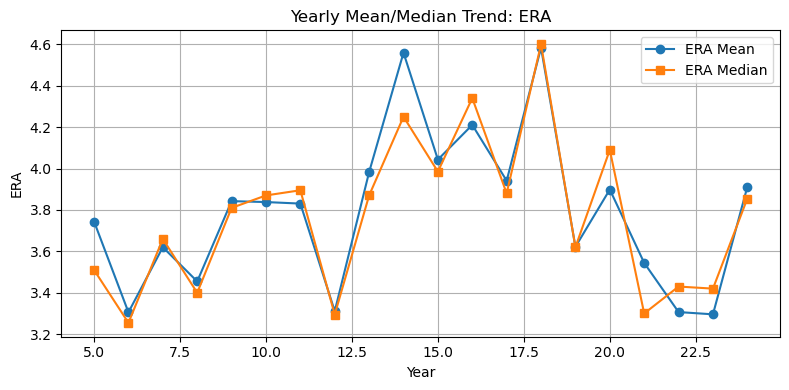

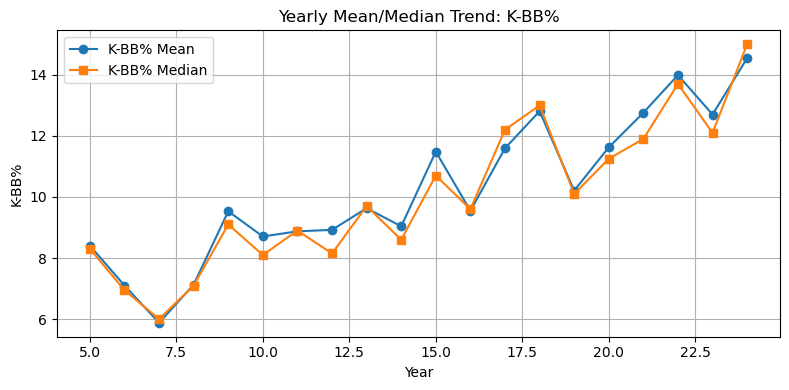

In [4]:
# pitcher
metrics = ['ERA',  'K-BB%']

for metric in metrics:
    # 연도별 평균/중앙값 계산
    annual = kbo20_pitcher.groupby('Year')[metric].agg(['mean', 'median'])

    plt.figure(figsize=(8, 4))
    plt.plot(annual.index, annual['mean'], marker='o', label=f'{metric} Mean')
    plt.plot(annual.index, annual['median'], marker='s', label=f'{metric} Median')
    plt.title(f'Yearly Mean/Median Trend: {metric}')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()  # 또는 plt.savefig(f"{metric}_trend.png")

In [5]:
kbo20_batter = pd.read_excel('/Users/seoyoonkim/Desktop/kbo_final/KBO_타격_05-24_규정_최종수정.xlsx')
print(kbo20_batter.columns)
kbo20_batter = kbo20_batter[['Name', 'Year', 'BB/K',  'IsoP']]
print(kbo20_batter.head())

Index(['Rank', 'Name', 'Year', 'K%', 'BB%', 'BB/K', 'BABIP', 'IsoP', 'IsoD',
       'R/ePA', 'wOBA', 'wRC', 'RC27', 'Own%', 'wRC+'],
      dtype='object')
  Name  Year  BB/K   IsoP
0  테임즈    15  1.13  0.409
1  김태균    12  1.17  0.173
2  양준혁     7  2.07  0.226
3  박병호    18  0.60  0.373
4  김현수     8  2.00  0.152


In [6]:
kbo20_batter.isnull().sum()

Name    0
Year    0
BB/K    0
IsoP    0
dtype: int64

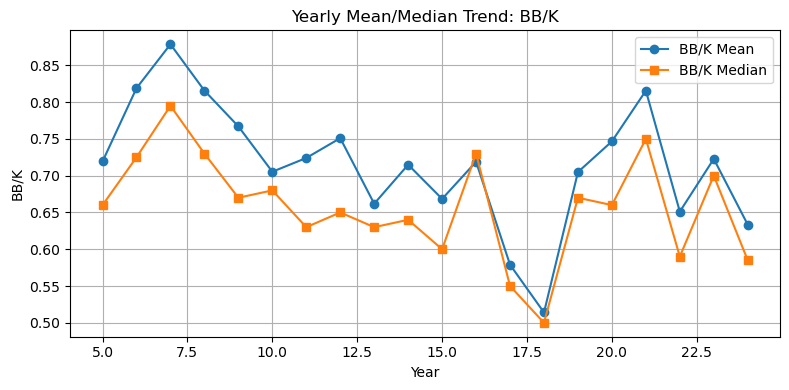

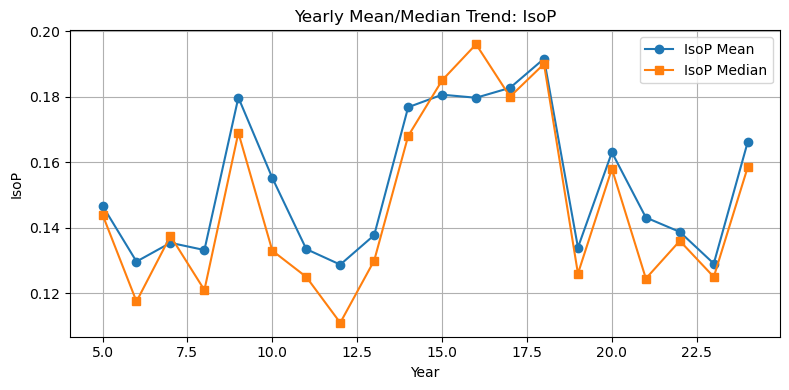

In [7]:
# batter
metrics = ['BB/K',  'IsoP']

for metric in metrics:
    # 연도별 평균/중앙값 계산
    annual = kbo20_batter.groupby('Year')[metric].agg(['mean', 'median'])

    plt.figure(figsize=(8, 4))
    plt.plot(annual.index, annual['mean'], marker='o', label=f'{metric} Mean')
    plt.plot(annual.index, annual['median'], marker='s', label=f'{metric} Median')
    plt.title(f'Yearly Mean/Median Trend: {metric}')
    plt.xlabel('Year')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()  # 또는 plt.savefig(f"{metric}_trend.png")

## 20년 분석 + 스케일링 ##

In [9]:
df1 = pd.read_excel('/Users/seoyoonkim/Desktop/kbo_final/KBO_타격_15-19_규정_구속.xlsx')
df2 = pd.read_excel('/Users/seoyoonkim/Desktop/kbo_final/KBO_타격_20-24_규정_구속.xlsx')
kbo20_batter_ev = pd.concat([df1, df2], ignore_index=True)
speed_cols = ['투심', '포심', '커터', '커브', '슬라',
              '첸접', '싱커', '포크', '너클', '기타']
kbo20_batter_ev['ev'] = kbo20_batter_ev[speed_cols].mean(axis=1)   
kbo20_batter_ev = kbo20_batter_ev[['Name', 'Year', 'ev']]
print(kbo20_batter_ev.head())
kbo20_batter_ev.isnull().sum() # 결측치 없음

#pitcher 구속
kbo20_pitcher_ev = pd.read_excel('/Users/seoyoonkim/Desktop/kbo_final/KBO_투구_15-24_규정_구속.xlsx')
print(kbo20_pitcher_ev.columns)
kbo20_pitcher_ev = kbo20_pitcher_ev[['Name', 'Year', '포심']]
print(kbo20_pitcher_ev.head())
kbo20_pitcher_ev.isnull().sum() # 결측치 FAv 1개
kbo20_pitcher_ev.dropna(subset=['포심'], inplace=True) # 결측치 제거


  Name  Year          ev
0  이성열    18  131.300000
1  김재환    18  132.200000
2  송광민    18  129.788889
3  하주석    18  131.766667
4  강백호    18  133.500000
Index(['Rank', 'Name', 'Year', 'G', 'IP', '포심'], dtype='object')
   Name  Year     포심
0   안우진    22  153.5
1   안우진    23  153.0
2    스탁    22  152.3
3  알칸타라    20  151.6
4  수아레즈    22  151.5


--- 원본 데이터프레임 로드 및 선택된 컬럼 ---
kbo20_batter_ev (타자 구속):
  Name  Year          ev
0  이성열  2018  131.300000
1  김재환  2018  132.200000
2  송광민  2018  129.788889
3  하주석  2018  131.766667
4  강백호  2018  133.500000
결측치:
 Name    0
Year    0
ev      0
dtype: int64
------------------------------
kbo20_pitcher_ev (투수 구속):
   Name  Year     포심
0   안우진  2022  153.5
1   안우진  2023  153.0
2    스탁  2022  152.3
3  알칸타라  2020  151.6
4  수아레즈  2022  151.5
결측치:
 Name    0
Year    0
포심      0
dtype: int64
------------------------------
kbo20_batter (타자 지표):
  Name  Year  BB/K   IsoP
0  테임즈  2015  1.13  0.409
1  김태균  2012  1.17  0.173
2  양준혁  2007  2.07  0.226
3  박병호  2018  0.60  0.373
4  김현수  2008  2.00  0.152
결측치:
 Name    0
Year    0
BB/K    0
IsoP    0
dtype: int64
------------------------------
kbo20_pitcher (투수 지표):
  Name  Year   ERA  K-BB%
0  류현진  2006  2.23   19.0
1  안우진  2022  2.11   22.1
2  류현진  2012  2.66   22.3
3   페디  2023  2.00   24.6
4  안우진  2023  2.39   20.7
결측치:
 Name     0
Year     0
ERA     

/var/folders/64/j8_v44fx38b3dgpdj9fq1m5c0000gn/T/ipykernel_20966/4125848788.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
/var/folders/64/j8_v44fx38b3dgpdj9fq1m5c0000gn/T/ipykernel_20966/4125848788.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Year'], inplace=True)


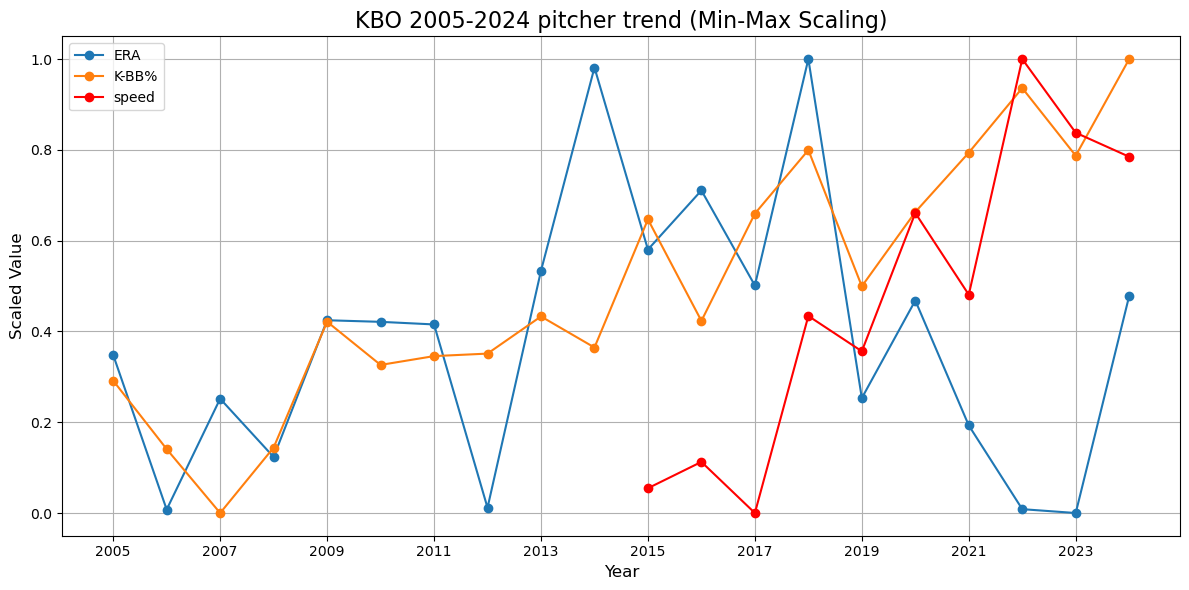

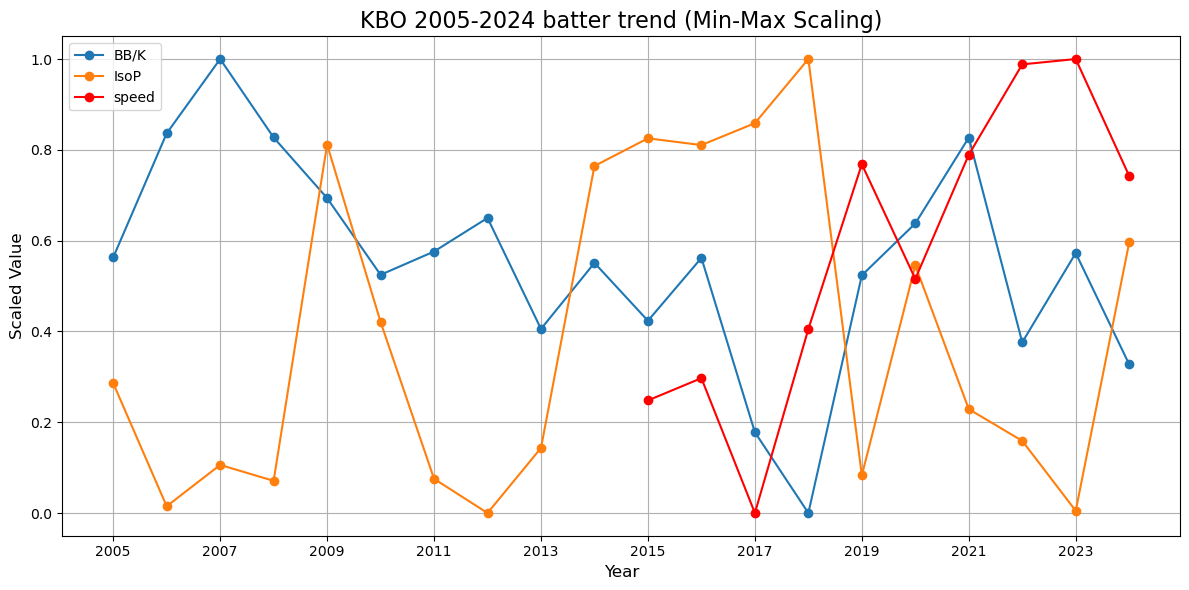

In [10]:
# 연도 형식을 통일하는 함수 (두 자리 연도를 네 자리로 변환)
def convert_to_full_year(df):
    """
    'Year' 컬럼의 값이 100 미만인 경우 2000을 더하여 4자리 연도로 변환합니다.
    """
    if 'Year' in df.columns:
        df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
        df['Year'] = df['Year'].apply(lambda y: y + 2000 if y < 100 else y)
    return df

# 각 데이터프레임의 'Year' 컬럼 형식을 통일합니다.
kbo20_batter_ev = convert_to_full_year(kbo20_batter_ev)
kbo20_pitcher_ev = convert_to_full_year(kbo20_pitcher_ev)
kbo20_batter = convert_to_full_year(kbo20_batter)
kbo20yrs_pitcher = convert_to_full_year(kbo20yrs_pitcher)

print("--- 원본 데이터프레임 로드 및 선택된 컬럼 ---")

# 1. 타자 구속 데이터 (15-24년)
kbo20_batter_ev = kbo20_batter_ev[['Name', 'Year', 'ev']]
print("kbo20_batter_ev (타자 구속):")
print(kbo20_batter_ev.head())
print("결측치:\n", kbo20_batter_ev.isnull().sum())
print("-" * 30)

# 2. 투수 구속 데이터 (15-24년)
kbo20_pitcher_ev = kbo20_pitcher_ev[['Name', 'Year', '포심']]
kbo20_pitcher_ev.dropna(subset=['포심'], inplace=True) # FAv 결측치 1개 제거
print("kbo20_pitcher_ev (투수 구속):")
print(kbo20_pitcher_ev.head())
print("결측치:\n", kbo20_pitcher_ev.isnull().sum())
print("-" * 30)

# 3. 타자 지표 데이터 (05-24년)
kbo20_batter = kbo20_batter[['Name', 'Year', 'BB/K', 'IsoP']]
print("kbo20_batter (타자 지표):")
print(kbo20_batter.head())
print("결측치:\n", kbo20_batter.isnull().sum())
print("-" * 30)

# 4. 투수 지표 데이터 (05-24년)
kbo20_pitcher = kbo20yrs_pitcher[['Name', 'Year', 'ERA', 'K-BB%']]
print("kbo20_pitcher (투수 지표):")
print(kbo20_pitcher.head())
print("결측치:\n", kbo20_pitcher.isnull().sum())
print("-" * 30)


# --- 데이터 병합 및 집계 ---
# 병합 전에 각 데이터프레임의 'Year' 컬럼을 정리합니다.
print("--- 병합 전 'Year' 컬럼 정리 ---")
for df, name in [(kbo20_batter_ev, "kbo20_batter_ev"), (kbo20_pitcher_ev, "kbo20_pitcher_ev"), (kbo20_batter, "kbo20_batter"), (kbo20_pitcher, "kbo20_pitcher")]:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
    df.dropna(subset=['Year'], inplace=True)
    print(f"Cleaned '{name}' (shape: {df.shape}) 'Year' column dtype: {df['Year'].dtype}")
    print(f"Cleaned '{name}' 'Year' unique values:\n", sorted(df['Year'].unique()))
    print("-" * 10)
print("-" * 30)

# 투수 데이터 병합: 05-24년 투수 지표와 15-24년 투수 구속
merged_pitcher = pd.merge(kbo20_pitcher, kbo20_pitcher_ev, on=['Name', 'Year'], how='outer')
# 타자 데이터 병합: 05-24년 타자 지표와 15-24년 타자 구속
merged_batter = pd.merge(kbo20_batter, kbo20_batter_ev, on=['Name', 'Year'], how='outer')

# 병합 후 'Year' 컬럼의 결측치를 제거합니다.
merged_pitcher.dropna(subset=['Year'], inplace=True)
merged_batter.dropna(subset=['Year'], inplace=True)

print("--- 데이터 병합 후 연도 컬럼 확인 ---")
print("병합된 투수 데이터의 고유 연도:\n", sorted(merged_pitcher['Year'].unique()))
print("병합된 타자 데이터의 고유 연도:\n", sorted(merged_batter['Year'].unique()))
print("-" * 30)

# 'Year'별 평균값 계산
pitcher_trends = merged_pitcher.groupby('Year')[['ERA', 'K-BB%', '포심']].mean().reset_index()
batter_trends = merged_batter.groupby('Year')[['BB/K', 'IsoP', 'ev']].mean().reset_index()

# 그래프를 그리기 전에 'Year' 컬럼의 최종 데이터 타입을 확인합니다.
print("--- 그룹화 후 연도 컬럼 타입 확인 ---")
print(f"pitcher_trends 'Year' column dtype: {pitcher_trends['Year'].dtype}")
print(f"batter_trends 'Year' column dtype: {batter_trends['Year'].dtype}")
print("-" * 30)

print("--- 연도별 평균값 (집계) ---")
print("투수 지표 트렌드:\n", pitcher_trends.head())
print("타자 지표 트렌드:\n", batter_trends.head())
print("-" * 30)

# --- Min-Max Scaling 함수 정의 ---
def min_max_scale(df):
    """
    DataFrame의 각 컬럼에 대해 Min-Max Scaling을 적용하는 함수
    (x - min(x)) / (max(x) - min(x))
    """
    return (df - df.min()) / (df.max() - df.min())

# Min-Max Scaling 적용
# 'Year' 컬럼을 제외한 지표 컬럼에만 스케일링 적용
scaled_pitcher = pitcher_trends.copy()
scaled_pitcher[['ERA', 'K-BB%', '포심']] = min_max_scale(scaled_pitcher[['ERA', 'K-BB%', '포심']])

scaled_batter = batter_trends.copy()
scaled_batter[['BB/K', 'IsoP', 'ev']] = min_max_scale(scaled_batter[['BB/K', 'IsoP', 'ev']])

print("--- Min-Max Scaling 적용 결과 ---")
print("스케일링된 투수 지표 트렌드:\n", scaled_pitcher.head())
print("스케일링된 타자 지표 트렌드:\n", scaled_batter.head())
print("-" * 30)

# --- 그래프 그리기 ---

# 1. 투수 지표 그래프
plt.figure(figsize=(12, 6))
plt.plot(scaled_pitcher['Year'], scaled_pitcher['ERA'], label='ERA', marker='o', linestyle='-')
plt.plot(scaled_pitcher['Year'], scaled_pitcher['K-BB%'], label='K-BB%', marker='o', linestyle='-')
plt.plot(scaled_pitcher['Year'], scaled_pitcher['포심'], label='speed', marker='o', linestyle='-', color='red')

plt.title('KBO 2005-2024 pitcher trend (Min-Max Scaling)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Value', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(np.arange(2005, 2025, 2))
plt.tight_layout()
plt.show()

# 2. 타자 지표 그래프
plt.figure(figsize=(12, 6))
plt.plot(scaled_batter['Year'], scaled_batter['BB/K'], label='BB/K', marker='o', linestyle='-')
plt.plot(scaled_batter['Year'], scaled_batter['IsoP'], label='IsoP', marker='o', linestyle='-')
plt.plot(scaled_batter['Year'], scaled_batter['ev'], label='speed', marker='o', linestyle='-', color='red')

plt.title('KBO 2005-2024 batter trend (Min-Max Scaling)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Scaled Value', fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(np.arange(2005, 2025, 2))
plt.tight_layout()
plt.show()
